In [26]:
import pandas as pd
# Load the original dataframe
df1 = pd.read_csv('allergen_peptides.csv')
df1['Allergen'] = 1
df2 = pd.read_csv('cosmetic and dermatology.csv')
df2['Allergen'] = 0
df = pd.concat([df1, df2], ignore_index=True)
df

,peptide ID,sequence,Allergen
0,2719,AAITCGQVVSKLTNCLSYLRSGGTVSTACCNGVTSLNKMANSTSDR...,1
1,3364,AAAVNAEPGWFDLQESVR,1
2,2527,AALLVALLFVANAAAFRTTITTMEIDEDIDNPRRRGEGCREQIQRQ...,1
3,3115,AAMAAVAAQGK,1
4,2555,AAPVEFTVEKGSDEKNLALSIKYNKEGDSMAEVELKEHGSNEWLAL...,1
...,...,...,...
2790,3578,YIGSR,0
2791,3708,YKSKKGGWTH,0
2792,3709,YNWN,0
2793,3710,YNWNSFGLRF,0


In [27]:
import numpy as np
import random
import pandas as pd

# ----------------------------
# 3. Mixup for Sequences
# ----------------------------
def mixup(seq1, seq2, y1, y2):
    """
    Mixup between two sequences and labels.
    - Returns: (seq1, seq2), (y_mix)
    """
    # String concatenation is symbolic — model should embed separately
    y_mix = (y1 + y2)/2
    return (seq1, seq2), y_mix

# Separate data by Allergen label
df_label_0 = df[df['Allergen'] == 0].reset_index(drop=True)
df_label_1 = df[df['Allergen'] == 1].reset_index(drop=True)

augmented_mixup_data = []

# Apply mixup within label 0 for all pairs
for i in range(len(df_label_0)):
    for j in range(len(df_label_0)):
        seq1 = df_label_0.loc[i, 'sequence']
        seq2 = df_label_0.loc[j, 'sequence']
        y1 = df_label_0.loc[i, 'Allergen']
        y2 = df_label_0.loc[j, 'Allergen']
        (seq1_mixed, seq2_mixed), y_mix = mixup(seq1, seq2, y1, y2)
        augmented_mixup_data.append({
            'sequence1': seq1_mixed,
            'sequence2': seq2_mixed,
            'Allergen': y_mix,
            })

# Apply mixup within label 1 for all pairs
for i in range(len(df_label_1)):
    for j in range(len(df_label_1)):
        seq1 = df_label_1.loc[i, 'sequence']
        seq2 = df_label_1.loc[j, 'sequence']
        y1 = df_label_1.loc[i, 'Allergen']
        y2 = df_label_1.loc[j, 'Allergen']
        (seq1_mixed, seq2_mixed), y_mix = mixup(seq1, seq2, y1, y2)
        augmented_mixup_data.append({
            'sequence1': seq1_mixed,
            'sequence2': seq2_mixed,
            'Allergen': y_mix
            })


# Create a DataFrame from the augmented data
augmented_mixup_df_same_label = pd.DataFrame(augmented_mixup_data)

# Concatenate sequence1 and sequence2 to create a new 'sequence' column
augmented_mixup_df_same_label['sequence'] = augmented_mixup_df_same_label['sequence1'].astype(str) + augmented_mixup_df_same_label['sequence2'].astype(str)

# Display the updated DataFrame
display(augmented_mixup_df_same_label.head())

,sequence1,sequence2,Allergen,sequence
0,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,0.0,ACYCRIPACIAGERRYGTCIYQGRLWAFCCACYCRIPACIAGERRY...
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,AECK,0.0,ACYCRIPACIAGERRYGTCIYQGRLWAFCCAECK
2,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,AESPLTNRGWNP,0.0,ACYCRIPACIAGERRYGTCIYQGRLWAFCCAESPLTNRGWNP
3,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,AH,0.0,ACYCRIPACIAGERRYGTCIYQGRLWAFCCAH
4,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,AHSH,0.0,ACYCRIPACIAGERRYGTCIYQGRLWAFCCAHSH


In [28]:
# The previous mixup process is already performed in the cell above (jAPZtNpOTEoF).
# You can continue with further analysis or processing of the augmented_mixup_df_same_label DataFrame here.
# For example, you might want to:
# - Save the augmented data to a new CSV file
# - Perform further data analysis or visualization
# - Use the augmented data for training a model
# - Display information about the augmented data (e.g., shape, info(), describe())

# Display the shape of the augmented dataframe as an example
display(augmented_mixup_df_same_label.shape)

(6172333, 4)

In [29]:
counts = augmented_mixup_df_same_label['Allergen'].value_counts()
print(counts)

Allergen
1.0    6061444
0.0     110889
Name: count, dtype: int64


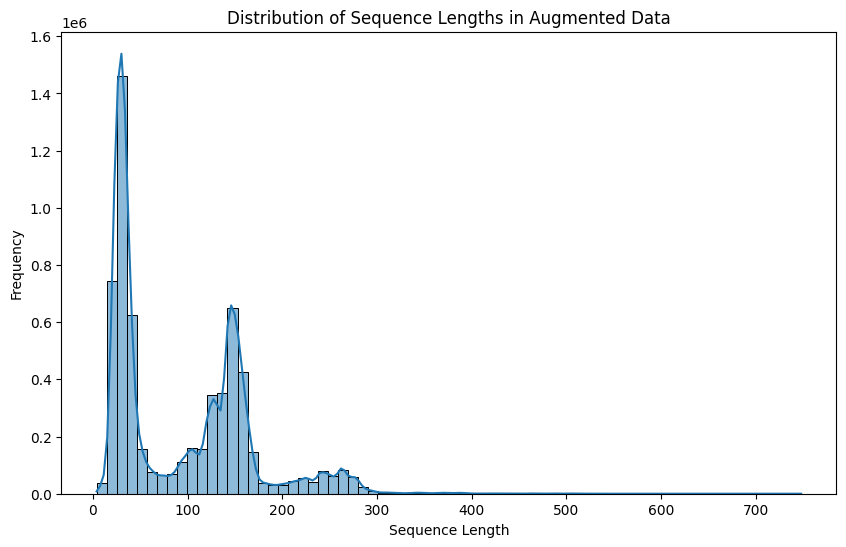

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sequence lengths
augmented_mixup_df_same_label['sequence_length'] = augmented_mixup_df_same_label['sequence'].str.len()

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(augmented_mixup_df_same_label['sequence_length'], kde=True, bins=70)
plt.title('Distribution of Sequence Lengths in Augmented Data')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

In [31]:
data = augmented_mixup_df_same_label
counts = data['Allergen'].value_counts()
print(counts)

Allergen
1.0    6061444
0.0     110889
Name: count, dtype: int64


In [32]:
# Drop sequences with length smaller than 6 and create a new dataframe
data = data[data['sequence'].str.len() <= 40].copy()
data_filtered = data[data['sequence'].str.len() > 7].copy()
data = data_filtered

In [33]:
initial_row_count = len(data)
data_cleaned = data.drop_duplicates()
rows_dropped = initial_row_count - len(data_cleaned)

print(f"Initial row count: {initial_row_count}")
print(f"Row count after dropping duplicates: {len(data_cleaned)}")
print(f"Number of rows dropped: {rows_dropped}")

Initial row count: 2622291
Row count after dropping duplicates: 2622291
Number of rows dropped: 0


In [34]:
data = data_cleaned
initial_row_count = len(data)
data_cleaned = data.drop_duplicates()
rows_dropped = initial_row_count - len(data_cleaned)

print(f"Initial row count: {initial_row_count}")
print(f"Row count after dropping duplicates: {len(data_cleaned)}")
print(f"Number of rows dropped: {rows_dropped}")

Initial row count: 2622291
Row count after dropping duplicates: 2622291
Number of rows dropped: 0


In [35]:
data = data_cleaned
# Separate classes
minority_class = data[data['Allergen'] == data['Allergen'].value_counts().idxmin()]
majority_class = data[data['Allergen'] == data['Allergen'].value_counts().idxmax()]

# Undersample majority class
majority_class_sampled = majority_class.sample(n=len(minority_class), random_state=42)

# Combine the balanced classes
balanced_data = pd.concat([minority_class, majority_class_sampled])

# Shuffle the balanced data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

counts = balanced_data['Allergen'].value_counts()
print(counts)

Allergen
0.0    87315
1.0    87315
Name: count, dtype: int64


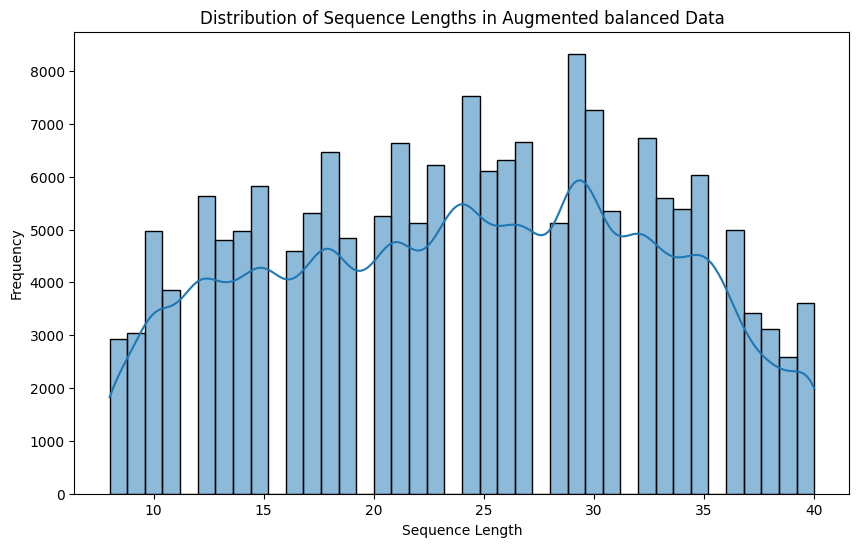

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sequence lengths
balanced_data['sequence_length'] = balanced_data['sequence'].str.len()

# Plot the distribution of sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(balanced_data['sequence_length'], kde=True, bins=40)
plt.title('Distribution of Sequence Lengths in Augmented balanced Data')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

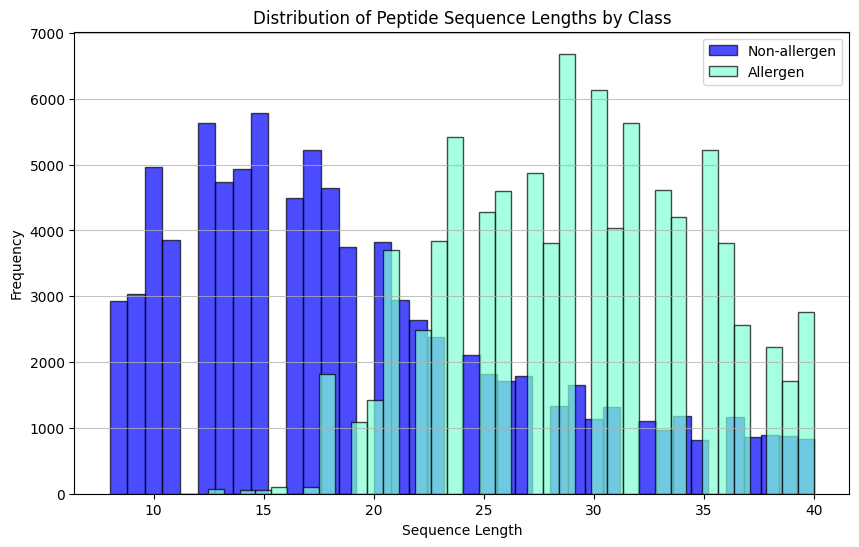

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Check if the 'sequence' and 'class' columns exist
    if 'sequence' in balanced_data.columns and 'Allergen' in balanced_data.columns:
        # Calculate the length of each sequence
        balanced_data['sequence_length'] = balanced_data['sequence'].str.len()

        # Separate data by class
        balanced_data_class_0 = balanced_data[balanced_data['Allergen'] == 0]
        balanced_data_class_1 = balanced_data[balanced_data['Allergen'] == 1]

        # Plot histograms for each class
        plt.figure(figsize=(10, 6))
        plt.hist(balanced_data_class_0['sequence_length'], bins=40, edgecolor='black',
                 color='blue', alpha=0.7, label='Non-allergen')
        plt.hist(balanced_data_class_1['sequence_length'], bins=40, edgecolor='black',
                 color='aquamarine', alpha=0.7, label='Allergen')

        # Set plot title and labels
        plt.title('Distribution of Peptide Sequence Lengths by Class')
        plt.xlabel('Sequence Length')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.legend() # Add a legend to distinguish the classes
        plt.show()

    else:
        print("Error: 'sequence' or 'class' column not found in the CSV file.")

except Exception as e:
    print(f"An error occurred: {e}")

In [43]:
# Number of samples o each class
n = 20000
# Sample class 0
balanced_data_class_0_sampled = balanced_data_class_0.sample(n=n, random_state=42)

# Sample class 1
balanced_data_class_1_sampled = balanced_data_class_1.sample(n=n, random_state=42)

# Combine the balanced classes
combined_data = pd.concat([balanced_data_class_0_sampled, balanced_data_class_1_sampled])

# Shuffle the balanced data
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

counts = combined_data['Allergen'].value_counts()
print(counts)

Allergen
1.0    20000
0.0    20000
Name: count, dtype: int64


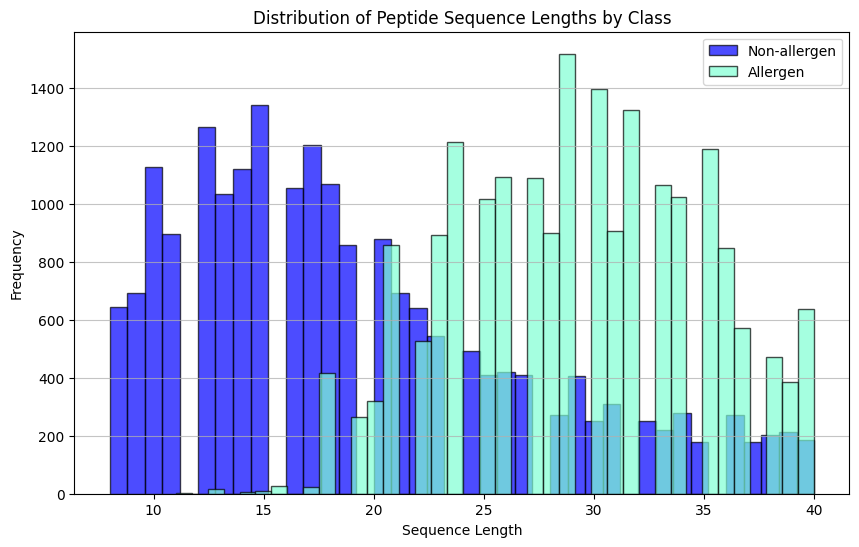

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Check if the 'sequence' and 'class' columns exist
    if 'sequence' in combined_data.columns and 'Allergen' in combined_data.columns:
        # Calculate the length of each sequence
        balanced_data['sequence_length'] = balanced_data['sequence'].str.len()

        # Separate data by class
        combined_data_class_0 = combined_data[combined_data['Allergen'] == 0]
        combined_data_class_1 = combined_data[combined_data['Allergen'] == 1]

        # Plot histograms for each class
        plt.figure(figsize=(10, 6))
        plt.hist(combined_data_class_0['sequence_length'], bins=40, edgecolor='black',
                 color='blue', alpha=0.7, label='Non-allergen')
        plt.hist(combined_data_class_1['sequence_length'], bins=40, edgecolor='black',
                 color='aquamarine', alpha=0.7, label='Allergen')

        # Set plot title and labels
        plt.title('Distribution of Peptide Sequence Lengths by Class')
        plt.xlabel('Sequence Length')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.legend() # Add a legend to distinguish the classes
        plt.show()

    else:
        print("Error: 'sequence' or 'class' column not found in the CSV file.")

except Exception as e:
    print(f"An error occurred: {e}")

In [45]:
combined_data.to_csv('Allergen_combined.csv', index=False)